In [2]:
import json

with open("verbalist/datasets/sharegpt/sg_90k_part1.json") as f:
    dataset1 = json.load(f)
with open("verbalist/datasets/sharegpt/sg_90k_part2.json") as f:
    dataset2 = json.load(f)
dataset = dataset1 + dataset2

# with open("./verbalist/datasets/openchat_sharegpt4_dataset/sharegpt_gpt4.json") as f:
#     dataset = json.load(f)

conversation_field = "conversations"
# conversation_field = "items"

In [3]:
len(dataset)

90665

In [26]:
# dataset[0]

## create russian dataset


In [6]:
import re
import regex
import hashlib


def filter_string(string):
    has = True
    has_zh = not len(re.findall(r"[\u4e00-\u9fff]+", string)) > 0
    has_ko = not len(re.findall(r"[\u3131-\ucb4c]+", string)) > 0
    # has_ar = not len(re.findall(r"[\u0621-\u64A]+", string)) > 0
    has = has_zh and has_ko
    invalid_letters = "ієùéàçğİžšالتيتعدواحدةمنأهمالقوىسياسيف"
    for letter in invalid_letters:
        if letter in string:
            return False
    return has


def has_cyrillic(text):
    return bool(regex.search(r"\p{IsCyrillic}", text))


clean_dataset = []

for conversation in dataset:
    all_text = "\n".join([item["value"] for item in conversation[conversation_field]])
    # print(all_text)
    # break
    if filter_string(all_text) and not has_cyrillic(all_text):
    # if filter_string(all_text) and has_cyrillic(all_text):
        clean_dataset.append(conversation)

In [7]:
len(clean_dataset), len(dataset)

(62336, 90665)

In [8]:
import markdownify


def correct_string(string):
    string = string.replace("\\_", "_")
    string = string.replace("\njavascriptCopy code `", "javascript\n")

    languages = [
        "css",
        "python",
        "go",
        "html",
        "kotlin",
        "diff",
        "vba",
        "sql",
        "",
        "javascript",
        "c",
        "cpp",
        "sass",
        'lua',
        "scss",
        'php'
    ]
    for lang in languages:
        string = string.replace(f"\n{lang}Copy code`", f"{lang}\n")

    string = string.replace("`\n```", "\n```")
    string = string.replace("\n ", "\n  ")
    string = string.replace("Share Prompt", "")
    delete_phrases = [
        "Как искусственный интеллект, я не являюсь владельцем физических объектов и не могу продавать или покупать предметы. Однако, я могу поделиться советом, как можно попытаться убедить кого-то в покупке карандаша.",
        "Как искусственный интеллект, я не имею личных чувств и мнений, и не могу иметь предпочтений в выборе между рождением своего ребенка и усыновлением приемного ребенка из приюта.",
        "1 / 1",
        "2 / 2",
        "3 / 3",
        "4 / 4",
        "5 / 5",
        "6 / 6",
        "7 / 7",
        "8 / 8",
        "9 / 9",
        "К сожалению, я не могу проверить дату вопроса, но я могу предоставить информацию о Максиме Радайкине и Борисе Марцинкевиче на начало 2021 года.",
        "К сожалению, я не могу вставить пример базы данных в чат, но я могу объяснить, что это такое.",
        "К сожалению, я не могу написать полноценное расширение для Google Chrome в рамках этой сессии. Однако,",
        "К сожалению, я не могу выбрать материалы и дизайн за вас, так как это зависит от ваших потребностей и предпочтений. Однако,",
        "Извините, но я не могу создать код для такой сложной программы с нуля, так как это потребовало бы обширных исследований, ресурсов и опыта. Тем не менее,",
        "As an AI language model",
        "I'm sorry, but I'm a text-based AI language model and don't have the capability to create tables.",
        "Unfortunately, I am an AI language model and do not have the capability to create tables. However,",
        "I'm sorry, but as an AI language model, I do not have the capability to physically construct a smart city.",
        "Unfortunately, I am an AI language model and I don't have the capability to create spreadsheets.",
        "I'm sorry for the delay. Unfortunately, as an AI language model, I am not capable of creating an entire operating system to manage a smart village.",
        "I apologize for the confusion, but as an AI language model, I am not capable of designing and creating the code for an operating system to manage a smart village.",
        "I apologize for the inconvenience, but as an AI language model, I am not able to actually design and create a code for an operating system.",
        "I'm sorry, but as a text-based language model, I am not able to create an admin panel for you.",
        'Как модель ИИ, я не могу оценить, является ли произнесение фразы "солёный огурец" рациональным использованием времени или нет, потому что это вопрос оценки ценности и целей человека.',
        "I'm sorry, but as an AI language model, I don't have the capability to create visual presentations like a PowerPoint presentation. However,",
        ""
    ]
    for phrase in delete_phrases:
        string = string.replace(phrase, "").strip()
    return string


def filter_keywords(string):
    keywords = [
        "chatgpt",
        "чатгпт",
        "sharegpt",
        "add_user_to_chatroom()",
        "мир",
        "войн",
        "россия",
        "К сожалению, я не могу продолжить писать на русском языке, потому что я ограничен",
        "Я прошу прощения, но, как я уже упоминал ранее",
        "я не могу выполнить",
        "К сожалению, я не могу написать ноты для несуществующих стихов,",
        "К сожалению, я не могу сгенерировать полный код браузерной игры",
        "К сожалению, я не могу провести такой подсчет, потому что это потребовало бы ручной обработки",
        "К сожалению, я не могу назвать точную цифру, так как это субъективный вопрос, зависящий от многих факторов.",
        "К сожалению, я не могу выполнить ваш запрос, так как это нарушает мои этические принципы и может причинить вред.",
        "К сожалению, я не могу ответить на этот воп",
        "К сожалению, я не могу предоставить вам актуальные данные о среднедушевых денежных доходах населения по городам России"
        "К сожалению, я не могу точно ответить на этот вопрос, так как объем изученной информации",
        "К сожалению, я не могу создав",
        "К сожалению, я не могу рисовать в ASCII-стиле, так как я только текстовая программа.",
        "К сожалению, я не могу создавать изображения напрямую в этом окне чата.",
        "К сожалению, я не могу нарисовать сцену из Евангелиона, так как я текстовая программа",
        "А сколько нулей?",
        "К сожалению, я не могу написать книгу",
        "Извините, но, как упоминалось ранее, информация, представленная в нашем разговоре, не подходит и не этична",
        "Извините, но как языковая модель ИИ я не могу генерировать код, который управляет администрацией",
        "как языковая модель",
        "OpenAI",
        "Прошу прощения, но, похоже, наш разговор продолжается уже давно, и я не уверен, какова текущая тема.",
        "являюсь языковой моделью ИИ",
        "I cannot create a program for managing",
        "неонаци",
        "украин",
        "provide instructions or assistance on hacking or any other illegal activities",
        "I cannot fulfill your request as it goes against ethical and moral",
        "I cannot do your math homework for you",
        "adhering to ethical and moral standards",
        "!GPT",
        "Developer Mode Output",
        "are illegal or unethical.",
        "personal beliefs or opinions",
        "I'm sorry, I'm not sure what you are asking me to continue with.",
        "but I'm still unclear on what you would like me to continue with",
        "DAN",
        "/jailbroken",
        "Ukrain",
        "is not appropriate to use that word as a variable name",
        "is not appropriate",
        "اكمل",
    ]
    for keyword in keywords:
        if keyword.lower() in string.lower():
            return False

    return True


total_string = ""
debug_dataset = False
# debug_dataset = True

unsensored_filtered_dataset = []
total_convs = 10000

for pos, conversation in enumerate(clean_dataset):
    conversation = [
        str(markdownify.markdownify(item["value"], heading_style="ATX"))
        for item in conversation[conversation_field]
    ]
    conversation_pairs = []
    if "https://chathub.gg" in conversation[0]:
        conversation.pop(0)
    full_text = " ".join(conversation)
    if filter_keywords(full_text):
        for i in range(1, len(conversation)):
            if (i + 1) % 2 == 0:
                if debug_dataset:
                    bot_message = "BOT " + correct_string(conversation[i])
                    user_message = "USER " + correct_string(conversation[i - 1])
                else:    
                    bot_message = correct_string(conversation[i])
                    user_message = correct_string(conversation[i - 1])
                conversation_pairs.append(user_message)
                conversation_pairs.append(bot_message)

    if len(conversation_pairs) > 0:
        unsensored_filtered_dataset.append(conversation_pairs)
    
    if debug_dataset:
        all_text = "\n===\n".join([item for item in conversation_pairs])
        total_string += all_text
        total_string += "===" * 10
        total_string += "\n"
        total_string += "===" * 10
        total_string += "\n"
        total_string += "===" * 10
        total_string += "\n"
    
    if pos > total_convs and debug_dataset:
        break 
print(total_string)

/home/kosenko/miniconda3/lib/python3.10/site-packages/markdownify/__init__.py:96: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(html, 'html.parser')
/home/kosenko/miniconda3/lib/python3.10/site-packages/markdownify/__init__.py:96: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(html, 'html.parser')
/home/kosenko/miniconda3/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure y

In [9]:
len(unsensored_filtered_dataset)

41689

/home/kosenko/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


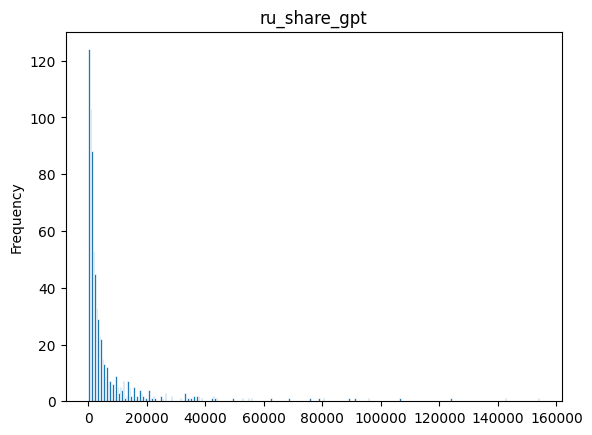

In [7]:
from transformers import AutoTokenizer
from verbalist.datasets.utils import visualize_hist

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-hf")

conversation_lengths = []


for conversation in clean_dataset:
    all_text = "\n===\n".join([item["value"] for item in conversation["conversations"]])
    conversation_lengths.append(len(tokenizer(all_text)["input_ids"]))
    # print(all_text)
    # print("="*100)
    # print("="*100)
    # print("="*100)
    # break
    # if has_cyrillic(all_text):
    #     rus_conv.append(conversation)


visualize_hist(conversation_lengths, "ru_share_gpt")

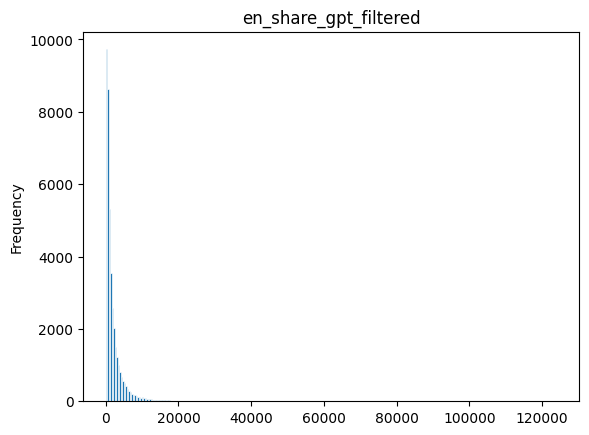

In [10]:
from transformers import AutoTokenizer
from verbalist.datasets.utils import visualize_hist

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-hf")

conversation_lengths = []


for conversation in unsensored_filtered_dataset:
    all_text = "\n===\n".join([item for item in conversation])
    conversation_lengths.append(len(tokenizer(all_text)["input_ids"]))
    # print(all_text)
    # print("="*100)
    # print("="*100)
    # print("="*100)
    # break
    # if has_cyrillic(all_text):
    #     rus_conv.append(conversation)


visualize_hist(conversation_lengths, "en_share_gpt_filtered")

In [12]:
len(conversation_lengths)

41689

In [19]:
import numpy as np

filter_num = 71
np.percentile(conversation_lengths, filter_num)

2029.0

In [20]:
len(
    np.array(conversation_lengths)[
        np.array(conversation_lengths) < np.percentile(conversation_lengths, filter_num)
    ]
)

29597

In [21]:
# filter_num = 85

passed_convs = (
    np.array(conversation_lengths) < np.percentile(conversation_lengths, filter_num)
).tolist()
unsensored_passed = []

for i, status in enumerate(passed_convs):
    if status:
        unsensored_passed.append(unsensored_filtered_dataset[i])

In [22]:
unsensored_passed[:1]

[['How to tell if a customer segment is well segmented? In 3 bullet points.',
  '1. Homogeneity: The segment should consist of customers who share similar characteristics and behaviors.\n2. Distinctiveness: The segment should be different from other segments in terms of their characteristics and behaviors.\n3. Stability: The segment should remain relatively stable over time and not change drastically. The characteristics and behaviors of customers within the segment should not change significantly.']]

In [23]:
unsensored_dataset = []
for conv in unsensored_passed:
    conv_hash = hashlib.sha256(conv[0].encode('utf-8')).hexdigest()
    unsensored_dataset.append({
        "conversation": conv,
        "hash": conv_hash
    })

In [24]:
from datasets import Dataset 
dataset = Dataset.from_list(unsensored_dataset)
dataset[0]

{'conversation': ['How to tell if a customer segment is well segmented? In 3 bullet points.',
  '1. Homogeneity: The segment should consist of customers who share similar characteristics and behaviors.\n2. Distinctiveness: The segment should be different from other segments in terms of their characteristics and behaviors.\n3. Stability: The segment should remain relatively stable over time and not change drastically. The characteristics and behaviors of customers within the segment should not change significantly.'],
 'hash': 'e84296385575a118acc07e395393d98701ec89808c7e07cb3dae0d0fe0aa0e64'}

In [25]:
# dataset_sample = dataset.train_test_split(test_size=3000, seed=42)
# dataset_sample = dataset_sample['test']
# dataset_sample.push_to_hub("dim/sharegpt_short_en")
dataset.push_to_hub("dim/sharegpt_short_en_30k", private=True)

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

In [37]:
# dataset.push_to_hub("dim/sharegpt_short_ru")

Deleting unused files from dataset repository: 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]
Updating downloaded metadata with the new split.


In [3]:
from datasets import load_dataset
dataset = load_dataset("dim/sharegpt_short_ru")
dataset['train'][10]

Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 922.84it/s]


Dataset parquet downloaded and prepared to /home/kosenko/.cache/huggingface/datasets/dim___parquet/dim--sharegpt_short_ru-0668387caa4a4469/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


100%|██████████| 1/1 [00:00<00:00, 918.59it/s]


{'conversation': ['Как наилучшим образом перевести слово "anticlimactic" на русский сохраняя его изначальное значение?',
  'Слово "anticlimactic" описывает ситуацию, когда ожидаемое событие не доставляет ожидаемого эмоционального подъема или разочаровывает. Наиболее подходящим переводом на русский язык будет "антиклимакс".\n\nЭтот термин унаследован из французского языка и описывает ситуацию, когда напряжение и ожидание достигают своего пика, а затем происходит неожиданный спад или облом. Он сохраняет ту же суть, что и "anticlimactic" и лучше всего передает оригинальный смысл этого слова.'],
 'hash': 'e0a5b1d474d45386b7168260592348347b2b400e7e23d4f25ee4e353d15c567f'}